In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from glob import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import shap

In [21]:
model = keras.models.load_model('with_mobilenet.h5')
model_expanded = keras.models.load_model("custom_cnn_expanded_data.h5")

In [4]:
birdseye_no = "brain_tumor 2/test/no/no1152.jpg"
birdseye_yes = "brain_tumor 2/test/yes/y1452.jpg"
side_no = "brain_tumor 2/test/no/Te-no_0015.jpg"
side_yes = "brain_tumor 2/test/yes/Te-me_0223.jpg"


In [6]:
def nn_visualize(filepath, model, destinationpath):
    img = image.load_img(filepath, target_size=(224, 224))
    img = image.img_to_array(img)
    img_re = img.reshape(1,224,224,3)
#     img_heat = img.reshape(-1,3)
    activation = keract.get_activations(model, img_re)
    keract.display_activations(activation, cmap='gray', save=True, directory='activations/'+destinationpath)
#     keract.display_heatmaps(activation, img_heat, save=True, directory='.activations/heat/'+destinationpath)

In [71]:
nn_visualize(birdseye_no, model, 'mobnet_birdseye_no')
nn_visualize(birdseye_yes, model, 'mobnet_birdseye_yes')
nn_visualize(birdseye_no, model_expanded, 'custom_birdseye_no')
nn_visualize(birdseye_yes, model_expanded, 'custom_birdseye_yes')

nn_visualize(side_no, model_expanded, 'custom_side_no')
nn_visualize(side_yes, model_expanded, 'custom_side_yes')

input_1 (1, 224, 224, 3) 
Conv1 (1, 112, 112, 32) 
bn_Conv1 (1, 112, 112, 32) 
Conv1_relu (1, 112, 112, 32) 
expanded_conv_depthwise (1, 112, 112, 32) 
expanded_conv_depthwise_BN (1, 112, 112, 32) 
expanded_conv_depthwise_relu (1, 112, 112, 32) 
expanded_conv_project (1, 112, 112, 16) 
expanded_conv_project_BN (1, 112, 112, 16) 
block_1_expand (1, 112, 112, 96) 
block_1_expand_BN (1, 112, 112, 96) 
block_1_expand_relu (1, 112, 112, 96) 
block_1_pad (1, 113, 113, 96) 
block_1_depthwise (1, 56, 56, 96) 
block_1_depthwise_BN (1, 56, 56, 96) 
block_1_depthwise_relu (1, 56, 56, 96) 
block_1_project (1, 56, 56, 24) 
block_1_project_BN (1, 56, 56, 24) 
block_2_expand (1, 56, 56, 144) 
block_2_expand_BN (1, 56, 56, 144) 
block_2_expand_relu (1, 56, 56, 144) 
block_2_depthwise (1, 56, 56, 144) 
block_2_depthwise_BN (1, 56, 56, 144) 
block_2_depthwise_relu (1, 56, 56, 144) 
block_2_project (1, 56, 56, 24) 
block_2_project_BN (1, 56, 56, 24) 
block_2_add (1, 56, 56, 24) 
block_3_expand (1, 56, 56

In [7]:
# def heat_visualize(filepath, model, destinationpath):
#     img = image.load_img(filepath, target_size=(224, 224))
#     img = image.img_to_array(img).reshape(1,224,224,3)
#     activation = keract.get_activations(model, img)
#     keract.display_heatmaps(activation, img, save=True, directory='.activations/heat/'+destinationpath)

In [22]:
img = image.load_img(birdseye_yes, target_size=(224, 224))
img = image.img_to_array(img).reshape(1,224,224,3)

img_no = image.load_img(birdseye_no, target_size=(224, 224))
img_no = image.img_to_array(img_no).reshape(1,224,224,3)

In [20]:
# SKIP

import tensorflow.compat.v1.keras.backend as K
# import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.executing_eagerly()

False

In [22]:
directory = "Brain_Tumor_Detection/"
pixel = np.zeros((3000,224,224,3))
target = []

for dataclass in glob(directory+'/*'):
    for i, file in enumerate(glob(dataclass+'/*')):
        img = image.load_img(file, target_size=(224, 224))
        img = image.img_to_array(img).reshape(1,224,224,3)
        pixel[i] = img
        target.append(dataclass.split("/")[-1])

In [27]:
masker = shap.maskers.Image("inpaint_telea", pixel[0].shape)
explainer = shap.Explainer(model_expanded, output_names=['no','yes'])

In [29]:
shap_values = explainer(pixel[1], max_evals=2000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])

TypeError: 'NoneType' object is not callable

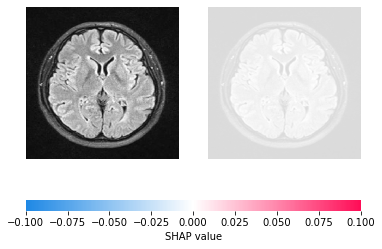

In [33]:
shap_values = e.shap_values(img_no)
shap.image_plot(shap_values, img_no)

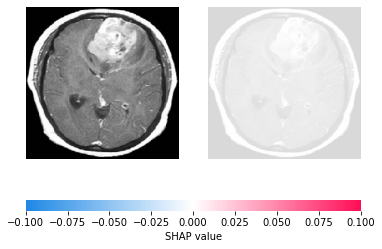

In [36]:
shap.image_plot(shap_values, img)

In [7]:
e = shap.DeepExplainer(model_expanded, pixel)

In [ ]:
shap_values = e.shap_values(pixel[1:2])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
2021-12-02 22:30:44.419092: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


In [ ]:
shap.image_plot(shap_values, -pixel[1:5])